In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
data=pd.read_csv('2.OnlineRetail.csv', encoding='ISO-8859-1')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data1=data[['InvoiceNo','InvoiceDate']]
data1=data1.drop_duplicates(subset='InvoiceNo',keep='first')
data1=data1.set_index(['InvoiceDate'])
data2=data1['2011']
data2=data2.reset_index()
data3=data2.groupby(by=data2['InvoiceDate'].dt.date).count()

C:\Users\Asus\AppData\Local\Temp\ipykernel_16580\4238911278.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data2=data1['2011']


Vẽ biểu đồ đường
Chọn mục tiêu Vẽ biểu đồ đường thể hiện xu hướng thay đổi số lượng đơn hàng theo thời gian trong năm 2011. 

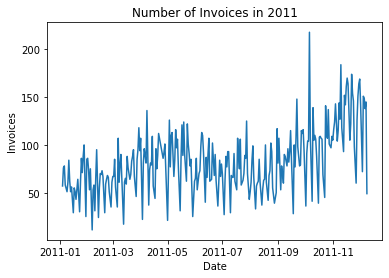

In [5]:
x=data3.index.get_level_values(0)
plt.plot(x,data3['InvoiceDate'])
plt.title('Number of Invoices in 2011')
plt.xlabel('Date')
plt.ylabel('Invoices')
plt.show()

Nhận xét:

Số lượng đơn hàng ngày có sự thay đổi mạnh.
Giữa tháng 10 và 11 có 1 ngày có số đơn tăng đột biến.
Tuy nhiên, biểu đồ này không thể hiện được việc thiếu dữ liệu trong 1 số ngày (do cách nhóm dữ liệu).

Vẽ biểu đồ cột so sánh số lượng đơn hàng trong các tháng của năm 2011. 

In [6]:
data4=data2.groupby(by=data2['InvoiceDate'].dt.month).count()
data4

,InvoiceDate,InvoiceNo
InvoiceDate,,
1,1476,1476
2,1393,1393
3,1983,1983
4,1744,1744
5,2162,2162
6,2012,2012
7,1927,1927
8,1737,1737
9,2327,2327


Vẽ biểu đồ cột so sánh số lượng đơn hàng trong mỗi tháng năm 2011

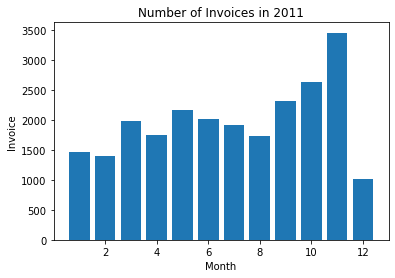

In [7]:
x=data4.index.get_level_values(0)
plt.bar(x,data4['InvoiceDate'])
plt.title('Number of Invoices in 2011')
plt.xlabel('Month')
plt.ylabel('Invoice')
plt.show()

3 tháng 9, 10, 11 có số lượng đơn hàng tăng đáng kể, trong đó tháng 11 có số đơn hàng cao nhất.
Tháng 12 có tổng số lượng đơn hàng thấp nhất.